<a href="https://colab.research.google.com/github/ducnguyen1704/TienXuLyDuLieu/blob/master/TH%E1%BB%B0C_H%C3%80NH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Thực hành] Chuẩn hoá dữ liệu với Min-Max Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,53.527514,0.946625,7.766046,39.783040,19.124226
1,39.630105,25.896138,9.383602,2.305013,23.639942
2,55.982432,7.186827,10.083769,10.326920,20.624685
3,44.191528,13.310224,10.285897,-1.032255,18.564488
4,59.855174,3.712880,11.725063,16.332172,22.782552


1. Trực quan hóa dữ liệu

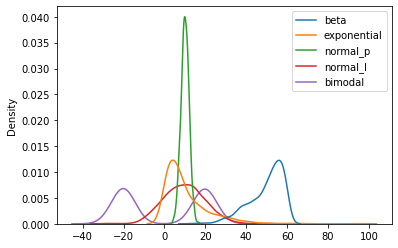

In [5]:
sns.kdeplot(data=df)

In [6]:
# thống kê dữ liệu
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.821379,10.524212,10.070721,9.720429,-0.238130
std,8.416502,11.028904,1.950556,9.980203,20.200767
min,13.364313,0.004114,4.350467,-28.767808,-30.008493
25%,44.550512,3.194578,8.835729,2.617636,-20.092932
50%,52.203135,6.945234,10.059807,9.599232,-0.972028
75%,56.345791,14.390585,11.355429,16.075498,19.763882
max,59.989702,95.260030,16.629514,46.274067,27.666724


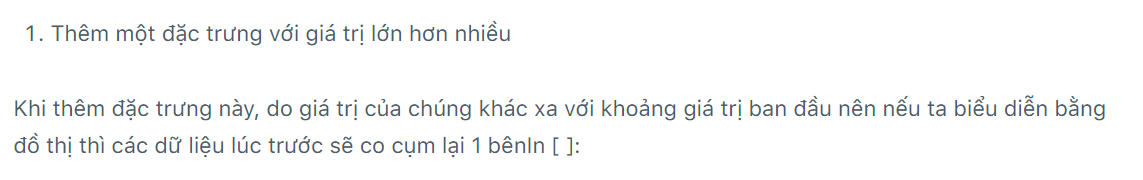

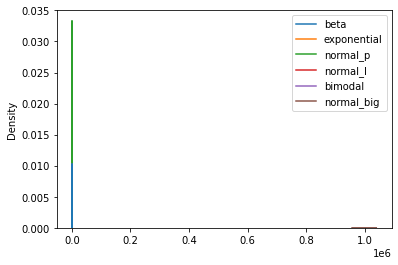

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

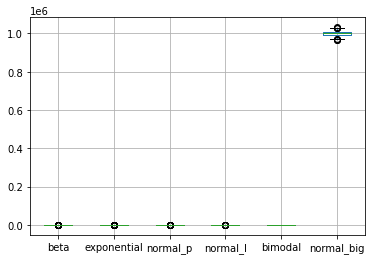

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

2. Chuẩn hóa với Min-Max scaling

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.861402,0.009895,0.278163,0.913501,0.851886,0.737010
1,0.563337,0.271815,0.409896,0.414073,0.930182,0.568930
2,0.914054,0.075404,0.466918,0.520972,0.877902,0.535802
3,0.661168,0.139688,0.483379,0.369601,0.842181,0.517526
4,0.997115,0.038935,0.600584,0.600998,0.915316,0.388800


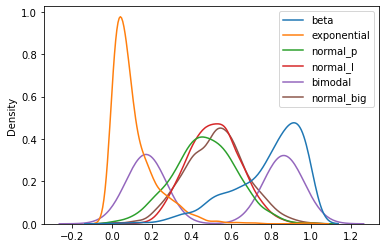

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

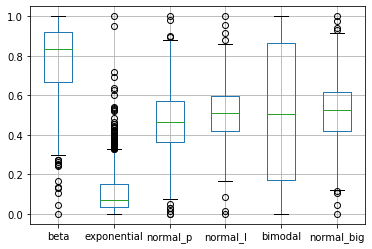

In [13]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.781914,0.110440,0.465855,0.512890,0.516173,0.523609
std,0.180513,0.115782,0.158852,0.132995,0.350250,0.151547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.668867,0.033494,0.365278,0.418239,0.171921,0.418413
50%,0.832997,0.072868,0.464966,0.511275,0.503448,0.527511
75%,0.921847,0.151030,0.570481,0.597577,0.862977,0.618910
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

0.9999999999999998

In [17]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[13.364312982685298,
 0.00411433769105101,
 4.350467175517475,
 -28.767808125545827,
 -30.00849255253491,
 964586.0497754236]

In [18]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.989702138780565,
 95.26002983771525,
 16.62951371768971,
 46.27406651652581,
 27.666723808687703,
 1031919.9697039474]

In [20]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0]